<a href="https://colab.research.google.com/github/morrea1/MANE-4962/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alex Morreale Homework 2 RIN: 662024409

#Question 1

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

import numpy as np
import pandas as pd

X = iris.data
y = iris.target

petal_area = X[:, 2] * X[:, 3]
sepal_petal_ratio = X[:, 0] * X[:, 1] / petal_area

new_features = np.column_stack((petal_area, sepal_petal_ratio))

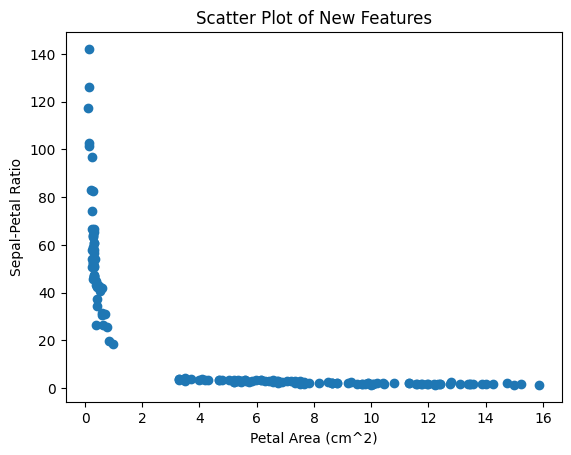

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(new_features[:, 0], new_features[:, 1])
plt.xlabel('Petal Area (cm^2)')
plt.ylabel('Sepal-Petal Ratio')
plt.title('Scatter Plot of New Features')
plt.show()

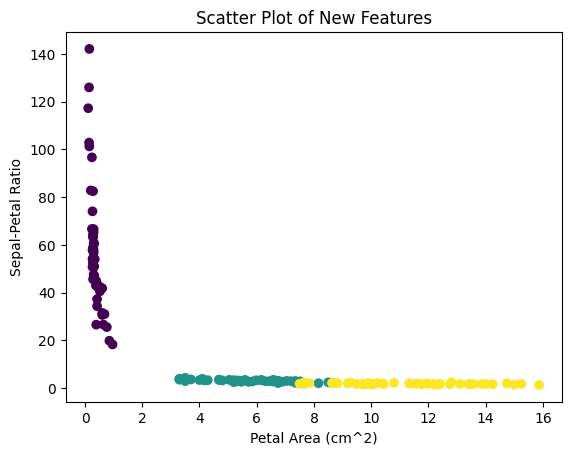

In [ ]:

plt.scatter(new_features[:, 0], new_features[:, 1], c = y)
plt.xlabel('Petal Area (cm^2)')
plt.ylabel('Sepal-Petal Ratio')
plt.title('Scatter Plot of New Features')
plt.show()

In [ ]:
X = new_features[:, :2]
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [ ]:
preds = clf.predict(X_test)
print('predictions')
print(preds)

predictions
[1 1 1 1 0 1 1 0 0 2 0 2 2 2 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]


In [ ]:
print('actual iris species')
print(y_test)

actual iris species
[1 1 1 1 0 1 2 0 0 2 0 2 2 1 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

accuracy score : 0.9666666666666667


#Question 2

X_train shape: (29492, 785), y_train shape: (29492,)
X_test shape: (4926, 785), y_test shape: (4926,)
training images shapes:  (29492, 28, 28)
testing images shapes:  (4926, 28, 28)
training targets shapes:  (29492,)
testing targers shapes:  (4926,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   

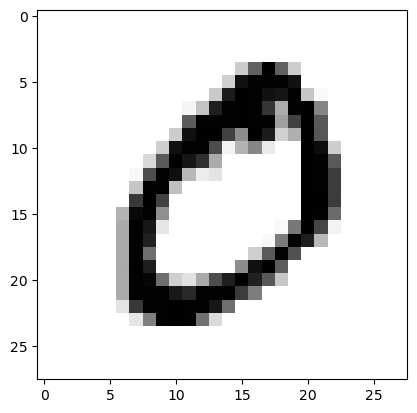

In [4]:
#taken from lecture 2 notes and code



from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#only use even numbers
even_train_cases = np.isin(y_train, [0, 2, 4, 6, 8])
even_test_cases = np.isin(y_test, [0, 2, 4, 6, 8])

x_train = x_train[even_train_cases]
y_train = y_train[even_train_cases]
x_test = x_test[even_test_cases]
y_test = y_test[even_test_cases]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


#show what we are working with
print("training images shapes: ", x_train.shape)
print("testing images shapes: ", x_test.shape)
print("training targets shapes: ", y_train.shape)
print("testing targers shapes: ", y_test.shape)
plt.imshow(x_train[0], cmap=plt.cm.gray_r, interpolation="nearest")
print(x_train[0])

In [5]:
# Flatten the images (28x28 to 1D array of size 784)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)


# data frames
df_train = pd.DataFrame(x_train_flat)
df_train['label'] = y_train

df_test = pd.DataFrame(x_test_flat)
df_test['label'] = y_test

#show examples
print("Train DataFrame sample:")
print(df_train.head())

print("\nTest DataFrame sample:")
print(df_test.head())


Train DataFrame sample:
   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      0  
1    0      4  
2    0      2  
3    0      4  
4    0      6  

[5 rows x 785 columns]

Test DataFrame sample:
   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0

preds: [2 0 4 ... 2 4 6]
actual: [2 0 4 ... 2 4 6]
Overall Accuracy: 0.9868047097036134
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           2       0.99      0.98      0.99      1032
           4       0.99      0.99      0.99       982
           6       0.99      0.99      0.99       958
           8       0.99      0.97      0.98       974

    accuracy                           0.99      4926
   macro avg       0.99      0.99      0.99      4926
weighted avg       0.99      0.99      0.99      4926



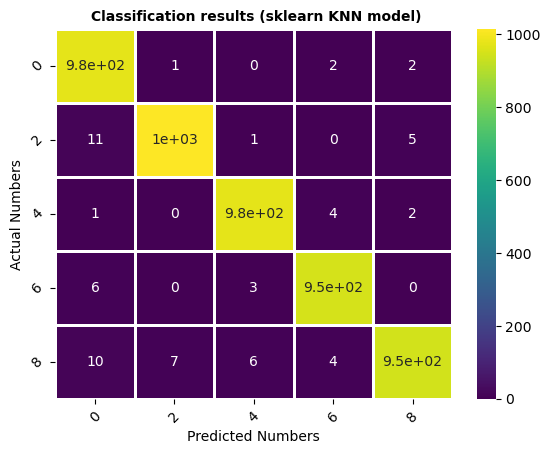

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#taken from professors github

X_train =df_train.to_numpy()
y_train = df_train['label'].to_numpy()
X_test = df_test.to_numpy()
y_test = df_test['label'].to_numpy()

from sklearn.neighbors import KNeighborsClassifier
skmodel = KNeighborsClassifier(n_neighbors=3)
skmodel.fit(X_train,y_train)
print('preds:', skmodel.predict(X_test))
print('actual:', y_test)
cm_sk = confusion_matrix(y_test, skmodel.predict(X_test))
ax = sns.heatmap(cm_sk,linewidths=2, annot=True, cmap='viridis', cbar=True);

ax.set_xticklabels([0, 2, 4, 6, 8]);
ax.set_yticklabels([0, 2, 4, 6, 8]);
print('Overall Accuracy: {}'.format(accuracy_score(y_test, skmodel.predict(X_test))))
plt.xlabel('Predicted Numbers');
plt.ylabel('Actual Numbers');
plt.xticks(rotation=45);
plt.yticks(rotation=45);
plt.title(' Classification results (sklearn KNN model)', fontsize='medium', fontweight='bold');
print(classification_report(y_test, skmodel.predict(X_test)))